In [1]:
import qmcpy as qp
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

print('okay')

okay


We want to examine Kronecker sequences in $[0,1]^d$ for Quasi-Monte Carlo integration. Kronecker sequences can be defined as

$$
\{ x_i = (i \boldsymbol{\alpha} + \boldsymbol{\Delta}) \mod \boldsymbol{1}~ | ~i = 0, 1, 2, ...) \}
$$

where $\boldsymbol{\alpha}, \boldsymbol{\Delta} \in [0,1)^d$. Below, we are comparing different sequences with the Kronecker sequences. By using Halton, Lattice, Digital Net base 2, and iid sequences, I wanted to see how they behave versus Kronecker sequences. We see that Kronecker sequence is a lot like Lattice sequence. The difference between both sequences is that Lattice sequence has to have a $2^m$ for $m \in \mathbb{N}$ number of samples, while Kronecker can have $n \in \mathbb{N}$ number of samples. Matter of fact, if we choose $\boldsymbol{\alpha}$ as $\boldsymbol{h} \phi_b(i)$, where $\phi_b$ is the van der Corput sequence in base b,  this would give us lattice sequence, at which can be written as 
$$
\{ x_i = ( \boldsymbol{h} \phi_b(i) + \boldsymbol{\Delta}) \mod \boldsymbol{1}~ | ~ i = 0, 1, 2, ...\},
$$
where $\boldsymbol{h}$ is the chosen $d$-dimensional integer vector, $\phi_b(i) = i_0 b^{-1} + i_1 b^{-2} + i_2 b^{-3} + ...$, and $\boldsymbol{\Delta} \in [0,1)^d$ is the shift for the lattice sequence. Notice, closely related they are compared to other sequences like iid, Halton, or Digital Net Base 2. While Halton sequence can be calculated as
$$
\{ x_i =  [ \phi_{b_1}(i), \phi_{b_2}(i), \phi_{b_3}(i),..., \phi_{b_d}(i)  ]~|~ i = 0, 1, 2, ... \},
$$
where for $b_1, b_2, b_3, ..., b_d$ are all distinct prime numbers in increasing order. And Digital Net 2 sequences can also be defined as

#Also Digital Net 2 sequences

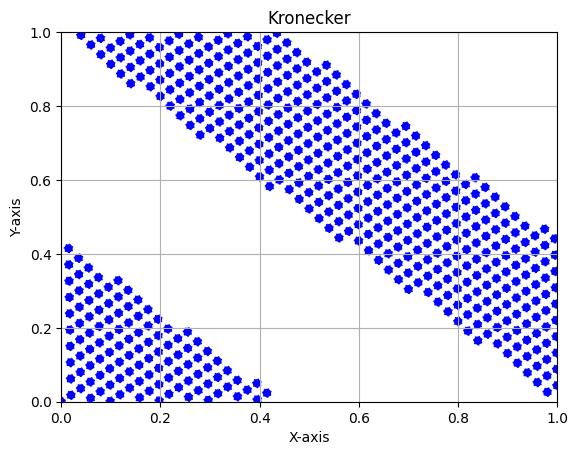

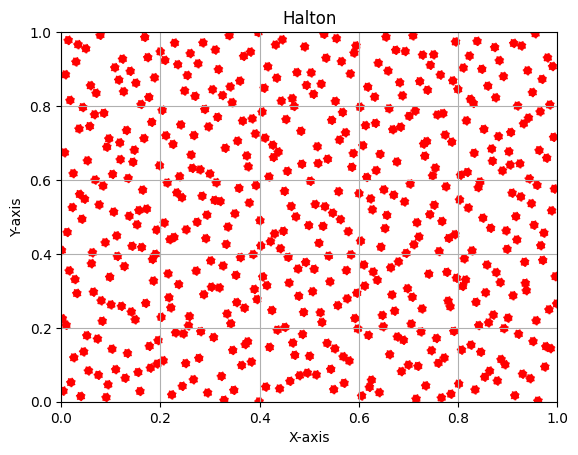

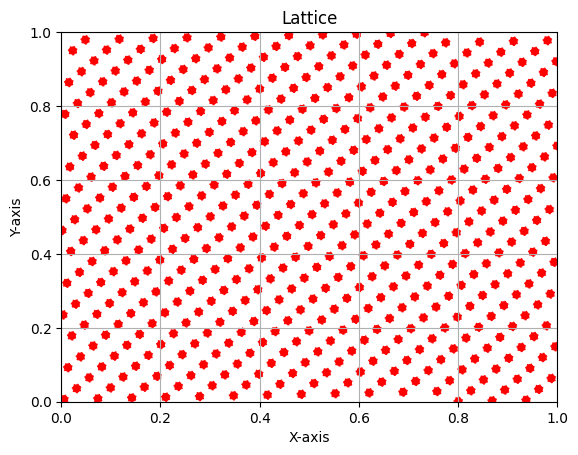

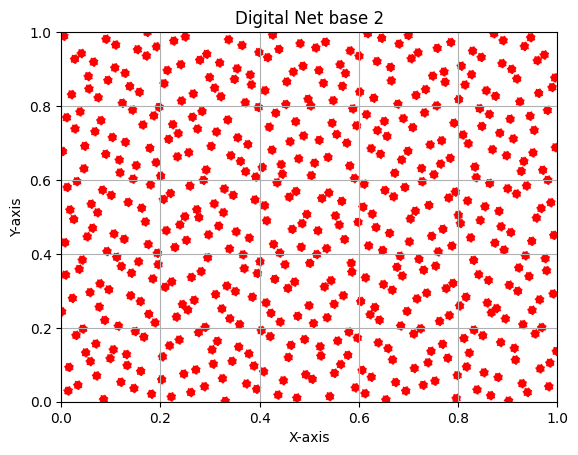

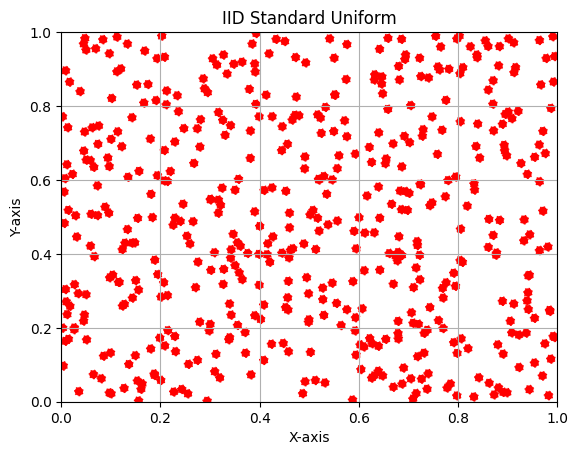

In [2]:
kronecker = qp.Kronecker(2)
K = kronecker.gen_samples(512)

halton = qp.Halton(2)
H = halton.gen_samples(512)

lattice = qp.Lattice(2)
L = lattice.gen_samples(512)

dnb2 = qp.DigitalNetB2(2)
d2 = dnb2.gen_samples(512)

dd = qp.IIDStdUniform(2)
iid = dd.gen_samples(512)

# Create a line plot
plt.scatter(K[:,0], K[:,1], color='blue', linestyle='dotted')
plt.title('Kronecker')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

plt.scatter(H[:,0], H[:, 1], color='red', linestyle='dotted')
plt.title('Halton')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

plt.scatter(L[:,0], L[:, 1], color='red', linestyle='dotted')
plt.title('Lattice')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

plt.scatter(d2[:,0], d2[:, 1], color='red', linestyle='dotted')
plt.title('Digital Net base 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

plt.scatter(iid[:,0], iid[:, 1], color='red', linestyle='dotted')
plt.title('IID Standard Uniform')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

From our paper, we want to calculated the weighted sum squared discrepancy. To get our best possible choice for $\boldsymbol{\alpha}$, we need to choose whichever choice of randomly generated $\boldsymbol{\alpha}$ that would give the least weighted sum squared discrepancy. To get weighted sum squared discrepancy, we calculate

"$, "WSSD =\\widetilde{K}(0) b_N(0) + 2\\sum_{k=1}^{N-1} b_N(k)\\widetilde{K}(k\\boldsymbol{\\alpha}\\mod\\boldsymbol{1}) -\\beta_N\\int_{[0,1] \\widetilde{K}\\boldsymbol{t})~d\\boldsymbol{,"  
n   "wher $\\beta_N= \\sum_{n=1}^N w_n$ and $b_N(k = \\sum_{n= k+1}^N w_n(n-k) / (n^2)$. Note, $b_N(k)$ can be rewritten\  $
    "b_N(k) = b_N(k1) + \\widetilde{b}_N(k1) + \\frac{w_{k+1}}{(k2
$,
    "for $k = N-2, N-3, ..., 0$where $\\widetilde{b}_Nk+1) = \\sum_{n=k+2}^N (w_n) /(n^2)$. Of corse, $\\widetilde{b}_N(N-1) = b_N(-1) = \\frac{w_n}{Na", n,
    "\\widetilde{b_N(k) = \\sum_{=k+1}^N \\frac{w_n{n^2} = \\widetilde{b}_(k+1) + \\frac{w_{k+1}}1\n $\n",
    "For simplicity, we can let $\\hat{b}(k) = w_k /(k^2)$ given be"  "\n",
    "#The last 3 equations on page 4 look at that fo the program."

In [3]:
def wtdsumsqdisckron(alphamat, dimension, sample, n = 50, Time = False, discwt = None,coordwts = np.arange(1,51).reshape((50, 1))):
    start_time = time.time()
    n_al = np.size(alphamat)
    d = dimension
    #Use numpy's shape function to find dimension d and the different number of samples for alpha in [0,.5)^d
    coordwts = coordwts[0:d]
    #Makes sure we don't have extra values for coordinate weights
    if discwt == None:
        Discwt = np.arange(1,n+1).reshape((n, 1))
        #If discwt was not specified. Go ahead with the calculation.
    else:
        Discwt = discwt(n)
    #Need to find beta, which is to take the sum of Discwt.
    beta = np.sum(Discwt)
    squared = (np.arange(1,n+1).reshape((n, 1)))**2 
    #To find bhat, for each element take Discwt / squared.
    bhat = Discwt / squared
    #Unlike Matlab, in python to reverse the order of bhat, we have to use np.flip
    #As python's cumsum is different from Matlab's cumsum, as 1 goes 1 way while
    #the other goes in the opposite direction which is why I flipped it again.
    btilde = np.cumsum(np.flip(bhat))
    btilde = np.flip(btilde)
    #Use np.squeeze to minimize the size of btilde and to do the np.flip appropraiately
    A = np.flip(np.squeeze(btilde))
    A[1:n] = A[0:n-1]
    A[0] = 0
    #For the 3 lines of code above, when playing with the matlab code, you shift each element in the array
    #by 1 towards the end. However, the first element must be 0.
    btilde = A + np.flip(np.squeeze(bhat))
    b = np.flip(np.cumsum(btilde))
    #To calculate b, you have to use cumsum and then flip it due to the fact that it's not in the right
    #order based off of the Matlab code while converting it
    kronecker= qp.Kronecker(alpha = alphamat)
    xkron = kronecker.gen_samples(n)
    #I had to redesign kronecker, so that it can deal with multiple choices of alpha.
    kernelkron = (1 + (0.5*coordwts[d-1]*(xkron*(xkron-1) + 1/6)))
    kernelkron = sample.reshape((n,1))*kernelkron
    wssd = -1*beta
    wssd = wssd + b[0]*kernelkron[0,:] + 2*np.sum(b[1:n].reshape((n-1, 1))*kernelkron[1:n, :],0)
    #In case you are interested in runtime in seconds for future use if we want to fasten the runtime.
    end_time = time.time()
    if Time == True:
        total_time = end_time - start_time
        return [wssd,xkron,b, bhat, btilde, kernelkron, total_time]
    else:
        return [wssd,xkron,b, bhat, btilde, kernelkron]

The point of this function is to find the best possible choice for $\boldsymbol{\alpha}$ by choicing whichever one would give the least weighted sum squared discrepancy at which 
$$
WSSD = \widetilde{K}(0) b(0) + 2 \sum_{k=1}^{N-1} b(k) \widetilde{K}(k \boldsymbol{\alpha} \mod \boldsymbol{1}) - \beta_N \int_{[0,1]} \widetilde{K}(\boldsymbol{t})~d \boldsymbol{t}
$$

At which $\beta_N = \sum_{n=1}^N w_n$ and $b_N(k) = \sum_{k+1}^N \frac{w_n(n-k)}{n^2}$. Note, $b_N(k)$ can be rewritten as 
$$
b_N(k) = b_N(k+1) + \widetilde{b_N}(k+1) + \frac{w_{k+1}}{(k+1)^2}
$$ 
for $k = N-2, N-3, ..., 0$ where $\widetilde{b_N}(k+1) = \sum_{n=k+2}^N \frac{w_n}{n^2}$. Of course, $\widetilde{b_N}(N-1) = b_N(N-1) = \frac{w_n}{N^2}$ and 
$$
\widetilde{b_N}(k) = \sum_{n=k+1}^N \frac{w_n}{n^2} = \widetilde{b_N}(k+1) + \frac{w_{k+1}}{(k+1)^2}$. To compute $\hat{b}(k)$, let $\hat{b}(k) = \frac{w_k}{k^2}
$$

The parameters this function will take are:

i.) $alphamat$ - A $(d \times n_{\alpha})$ 2D matrix where $d$ is the dimensions of $\boldsymbol{\alpha}$ and $n_{\alpha}$ is the amount samples of $\boldsymbol{\alpha}$. And this is required.

ii.) $n$ - being the number of samples within the Kronecker sequence.

iii.) $Time$ - set True if you want to record runtime (s) and False if you don't.

iv.) $limiter$ - limiter is the parameter to keep the computer from running too many computations at once and be overwhelmed.

v.) $discwt$ - That is the $w_n$ for the equation we have above.

vi.) $coordwts$ - The weights for each coordinate for the Kernels.

As for what the function gives out:

i.) $wssd$ - This will give the weighted sum squared discrepancy for each choice of $\boldsymbol{\alpha}$. 

ii.) $xkron$ - This is a $(n \times d \times n_{\alpha})$ 3D matrix where the first dimension is based on the sequence per choice of $\boldsymbol{\alpha} \in [0,1]^d$. 

iii.) $b$ - From the equation to calculate $WSSD$, it will give you $b(k)$ for $k = 1, 2, 3, ..., N-1$.

iv.) $bhat$ - This will give out the $\hat{b}(k)$ as calculated from what we have above for $k = N, N-1, N-2, ..., 1$.

v.) $btilde$ - This will give you $\widetilde{b}(k)$ for $k = N-2, N-3, ..., 0$ for the weighted sum squared discrepancy.

vi.) $total~time$ - This will give you the total runtime in seconds.

The Kronecker function gives a 3D Matrix in the shape of $(n \times d \times n_{\alpha})$ that generates a sequence of points using multiple choices of $\boldsymbol{\alpha} \in [0,1]^d$. Since to get Kronecker sequence, we have to calculate $\{ x_i = (i \boldsymbol{\alpha} + \Delta) \mod 1 \}$. Of course our paramter $alpha$ should be set such that
$$
alpha =
\begin{bmatrix}
\boldsymbol{\alpha}_1 & \boldsymbol{\alpha}_2 & \boldsymbol{\alpha}_3 & ... & \boldsymbol{\alpha}_{n_\alpha}
\end{bmatrix}
$$
At which for $\boldsymbol{\alpha}_j \in [0,1]^d$ for $j = 1, 2, 3, ..., n_\alpha$. We can rewrite $alphamat$ to be
$$
alpha = 
\begin{bmatrix}
\alpha_{(1,1)} & \alpha_{(1,2)} & \alpha_{(1,3)} & ... & \alpha_{(1,n_\alpha)}\\
\alpha_{(2,1)} & \alpha_{(2,2)} & \alpha_{(2,3)} & ... & \alpha_{(2,n_\alpha)}\\
\alpha_{(3,1)} & \alpha_{(3,2)} & \alpha_{(3,3)} & ... & \alpha_{(3,n_\alpha)}\\
... & ... & ... & ... & ... \\
\alpha_{(d,1)} & \alpha_{(d,2)} & \alpha_{(d,3)} & ... & \alpha_{(d, n_\alpha)}
\end{bmatrix}
$$

For $\alpha_{(i,j)} \in [0,1]$ for $i = 1, 2, 3, ..., d$. The parameter $delta$ is our shifting vector at which $\Delta \in [0,1]^d$. Our variable $n$ is the number of samples we want for the Kronecker sequence.

In [4]:
def alpha_generate(d, n_al, n, rd = None, discw = None, coordw = np.ones(50)):
    #rd serves as a randomization seed like in Halton, Lattice, and IID Uniform.",
    total = 0
    best_sample = np.ones(n)
    alphabest = np.array([])
    for i in range(d):
        np.random.seed(rd)
        alphamat = (np.arange(n_al)+np.random.rand(n_al))/(2*n_al)
        #Had it range from [0,.5)^d instead of [0,1)^d, because of the fact that if we choose alpha in [0,1)^d,
        #then we can show that by taking $1- alpha$ the discrepancy with the Bernoulli polynomial kernal stays
        #the same, so it would make better sense to choose alpha in [0,.5)^d.
        [wssd,xkron,b, bhat, btilde, samples, runtime] = wtdsumsqdisckron(alphamat, i+1, best_sample, n, Time = True, discwt = discw, coordwts = coordw)
        #Goes ahead and calculates discrepancy per choice of alpha in [0,.5)^d
        indice = np.argmin(wssd)
        #Finds the element with the smallest discrepancy, as finding the minimum is vital. However, we don't
        #need the minimum itself. Just the argmin out of the choices for n_al samples of alpha.
        alphabest = np.append(alphabest, alphamat[indice])
        best_sample = samples[:, indice]
        #Gets the best choice for alpha for that dimension and then in the line below, replaces all the 
        #elements in the i-th dimension with the chosen alphabest based upon the argmin algorithm.
        total = total + runtime
    return [alphabest, min(wssd), total]

In [5]:
def alpha_generate2(d, n_al, n, choice = 100, T = True, rd = None, discw = None, coordw = np.ones(50)):
    #rd serves as a randomization seed like in Halton, Lattice, and IID Uniform.",
    start = time.time()
    best_sample = np.ones(n)
    alphabest = np.zeros((choice, d))
    np.random.seed(rd)
    alphamat = (np.arange(n_al)+np.random.rand(n_al))/(2*n_al)
    #Had it range from [0,.5)^d instead of [0,1)^d, because of the fact that if we choose alpha in [0,1)^d,
    #then we can show that by taking $1- alpha$ the discrepancy with the Bernoulli polynomial kernal stays
    #the same, so it would make better sense to choose alpha in [0,.5)^d.
    [wssd,xkron,b, bhat, btilde, samples] = wtdsumsqdisckron(alphamat, 1, best_sample, n, Time = False, discwt = discw, coordwts = coordw)
    #Goes ahead and calculates discrepancy per choice of alpha in [0,.5)^d
    if choice > n_al:
        choice = n_al
    best_sample = np.ones((n,choice))
    min_wssd = np.array([])
    for choices in range(choice):
        indice = np.argmin(wssd)
        #Finds the element with the smallest discrepancy, as finding the minimum is vital. However, we don't
        #need the minimum itself. Just the argmin out of the choices for n_al samples of alpha.
        min_wssd = np.append(min_wssd, min(wssd))
        alphabest[choices, 0] = alphamat[indice]
        best_sample[:, choices] = samples[:, indice]
        #Gets the best choice for alpha for that dimension and then in the line below, replaces all the 
        #elements in the i-th dimension with the chosen alphabest based upon the argmin algorithm.
        wssd[indice] = np.max(wssd)
    if d == 1:
        total = time.time() - start
        return [alphabest[0], min(min_wssd), total]
    else:
        for i in range(1, d):
            new_alpha_list = np.zeros((choice, d))
            total_sample = np.zeros((n,n_al*choice))
            W = np.array([])
            min_wssd = np.array([])
            alpha_choices = np.array([])
            for dex in range(choice):
                np.random.seed(rd)
                alphamat = (np.arange(n_al)+np.random.rand(n_al))/(2*n_al)
                [wssd,xkron,b, bhat, btilde, samples] = wtdsumsqdisckron(alphamat, i+1, best_sample[:, dex], n, Time = False, discwt = discw, coordwts = coordw)
                total_sample[:,dex*n_al:(dex+1)*n_al] = samples
                W = np.append(W, wssd)
                alpha_choices = np.append(alpha_choices, alphamat)
            for j in range(choice):
                indice = np.argmin(W)
                min_wssd = np.append(min_wssd, min(W))
                new_alpha_list[j,:] = alphabest[indice //n_al]
                new_alpha_list[j,i] = alpha_choices[indice]
                best_sample[:, j] = total_sample[:, indice]
                W[indice] = np.max(W)
            alphabest = new_alpha_list
        total = time.time() - start
        return [alphabest[0], min_wssd[0], total]

In [8]:
def alpha_generate3(d, n_al, n, radius, rd = None, discw = None, coordw = np.ones(50)):
    #rd serves as a randomization seed like in Halton, Lattice, and IID Uniform.",
    total = 0
    best_sample = np.ones(n)
    alphabest = np.array([])
    initial = .39
    for i in range(d):
        np.random.seed(rd)
        alphamat = (initial + ((4*radius)*(np.arange(n_al)+np.random.rand(n_al))/(2*n_al)) - radius) % .5
        #Had it range from [0,.5)^d instead of [0,1)^d, because of the fact that if we choose alpha in [0,1)^d,
        #then we can show that by taking $1- alpha$ the discrepancy with the Bernoulli polynomial kernal stays
        #the same, so it would make better sense to choose alpha in [0,.5)^d.
        [wssd,xkron,b, bhat, btilde, samples, runtime] = wtdsumsqdisckron(alphamat, i+1, best_sample, n, Time = True, discwt = discw, coordwts = coordw)
        #Goes ahead and calculates discrepancy per choice of alpha in [0,.5)^d
        indice = np.argmin(wssd)
        #Finds the element with the smallest discrepancy, as finding the minimum is vital. However, we don't
        #need the minimum itself. Just the argmin out of the choices for n_al samples of alpha.
        alphabest = np.append(alphabest, alphamat[indice])
        best_sample = samples[:, indice]
        #Gets the best choice for alpha for that dimension and then in the line below, replaces all the 
        #elements in the i-th dimension with the chosen alphabest based upon the argmin algorithm.
        total = total + runtime
    return [alphabest, min(wssd), total]

In [7]:
alpha_choice, wssd, runtime = alpha_generate2(100, 5000, 1000, choice = 20, rd = None, discw = None, coordw = np.ones(100))
print('For 20 choices')
print('Our choice for alpha is ' + str(alpha_choice))
print('The weighted sum sqaured discrepancy is ' + str(wssd))
print('Runtime is ' + str(runtime) + ' seconds')
difference = np.ediff1d(alpha_choice)
print(difference)
alpha_choice, wssd, runtime = alpha_generate2(100, 5000, 1000, choice = 10, rd = None, discw = None, coordw = np.ones(100))
print('For 10 choices')
print('Our choice for alpha is ' + str(alpha_choice))
print('The weighted sum sqaured discrepancy is ' + str(wssd))
print('Runtime is ' + str(runtime) + ' seconds')
difference = np.ediff1d(alpha_choice)
print(difference)
alpha_choice, wssd, runtime = alpha_generate2(100, 5000, 1000, choice = 5, rd = None, discw = None, coordw = np.ones(100))
print('For 5 choices')
print('Our choice for alpha is ' + str(alpha_choice))
print('The weighted sum sqaured discrepancy is ' + str(wssd))
print('Runtime is ' + str(runtime) + ' seconds')
difference = np.ediff1d(alpha_choice)
print(difference)
alpha_choice, wssd, runtime = alpha_generate2(100, 5000, 1000, choice = 2, rd = None, discw = None, coordw = np.ones(100))
print('For 2 choices')
print('Our choice for alpha is ' + str(alpha_choice))
print('The weighted sum sqaured discrepancy is ' + str(wssd))
print('Runtime is ' + str(runtime) + ' seconds')
difference = np.ediff1d(alpha_choice)
print(difference)
alpha_choice, wssd, runtime = alpha_generate(100, 5000, 1000, rd = None, discw = None, coordw = np.ones(100))
print('Our choice for alpha is ' + str(alpha_choice))
print('The weighted sum sqaured discrepancy is ' + str(wssd))
print('Runtime is ' + str(runtime) + ' seconds')
difference = np.ediff1d(alpha_choice)
print(difference)

For 20 choices
Our choice for alpha is [0.37970692 0.29494598 0.21254995 0.16103681 0.43916121 0.47175764
 0.36945053 0.22383537 0.34660668 0.27087205 0.09629057 0.06590021
 0.25507613 0.17087053 0.20240671 0.07727006 0.14135589 0.04973083
 0.08833516 0.2467253  0.4021048  0.27713437 0.48564272 0.33830899
 0.11722009 0.4207101  0.43107133 0.03583745 0.45338097 0.12828553
 0.11062777 0.15166209 0.46319855 0.16491332 0.04569695 0.31872421
 0.35674464 0.18362682 0.02696441 0.29975236 0.49609715 0.05955876
 0.39065895 0.3276527  0.24441444 0.17473173 0.30815777 0.44343362
 0.19370183 0.23701393 0.06822901 0.28495484 0.18027664 0.433641
 0.02117671 0.31455589 0.20811665 0.39711585 0.07984586 0.25290102
 0.41313587 0.35151585 0.26753666 0.40898221 0.30529053 0.12273705
 0.21398042 0.38219917 0.01624306 0.28114303 0.23262779 0.37462628
 0.02540985 0.18921463 0.48152167 0.45090994 0.13088108 0.03933276
 0.29094781 0.08637851 0.33703854 0.46652843 0.48423582 0.42318941
 0.10028168 0.47759316 0.

In [17]:
alpha_choice, wssd, runtime = alpha_generate(100, 5000, 1000, rd = None, discw = None, coordw = np.ones(100))
print('Our choice for alpha is ' + str(alpha_choice))
print('The weighted sum sqaured discrepancy is ' + str(wssd))
print('Runtime is ' + str(runtime) + ' seconds')

[1.00000000e+03 9.92514529e+02 9.86029058e+02 9.80043587e+02
 9.74391450e+02 9.68989312e+02 9.63787175e+02 9.58751704e+02
 9.53859090e+02 9.49091477e+02 9.44434974e+02 9.39878471e+02
 9.35412878e+02 9.31030618e+02 9.26725281e+02 9.22491372e+02
 9.18324130e+02 9.14219388e+02 9.10173470e+02 9.06183107e+02
 9.02245376e+02 8.98357645e+02 8.94517533e+02 8.90722875e+02
 8.86971696e+02 8.83262183e+02 8.79592670e+02 8.75961619e+02
 8.72367605e+02 8.68809305e+02 8.65285488e+02 8.61795004e+02
 8.58336779e+02 8.54909803e+02 8.51513130e+02 8.48145870e+02
 8.44807180e+02 8.41496268e+02 8.38212384e+02 8.34954815e+02
 8.31722887e+02 8.28515959e+02 8.25333422e+02 8.22174694e+02
 8.19039221e+02 8.15926476e+02 8.12835954e+02 8.09767170e+02
 8.06719663e+02 8.03692989e+02 8.00686724e+02 7.97700458e+02
 7.94733801e+02 7.91786374e+02 7.88857815e+02 7.85947774e+02
 7.83055916e+02 7.80181914e+02 7.77325457e+02 7.74486240e+02
 7.71663973e+02 7.68858373e+02 7.66069166e+02 7.63296088e+02
 7.60538883e+02 7.577973

The function alpha_generate is used to generate the best $\boldsymbol{\alpha} \in [0, .5]^d$. The reason why we have $[0, .5]^d$ instead of $[0,1]^d$, because based on our Kronecker Symmetric Theorem, replacing one of the elements from $\alpha_\ell$ to $1 - \alpha_\ell$ would not change our discrepancy. Which would mean that our search for $\boldsymbol{\alpha}$ is of a smaller volume. Of course, the mission in order to get our best $\boldsymbol{\alpha}$ is to find which of these choices generated is the minimum. We have the following parameters:

We have $d$ representing the number of dimensions for $\boldsymbol{\alpha}$ we want generated. The n_al is the amount of samples for $\boldsymbol{\alpha}$ we are using. The variable $n$ of course is the number of samples for the Kronecker sequence. I put in rd which is the random seed in case someone wants to get rid of a mistake; however, rd I left optional. The paramter Limit is for the wtdsumsqdisckron function to limit how many calculations to do since calculating wssd for each generated $\boldsymbol{\alpha}$ can overwhelm the computer. Discw is the discrepancy weights which is $w_n$ in the WSSD function we have earlier in this demo. Coordw is the coordinate weights for the Kernels.

The function itself will return the best possible $\boldsymbol{\alpha} \in [0, .5]^d$ for the Kronecker sequence. The variable min(wssd) gives out the minimum weighted sum squared discrepancy of the best possible $\boldsymbol{\alpha}$. Finally, the variable total will give you the runtime of finding the best choice for $\boldsymbol{\alpha}$. 

In [12]:
square = 1/((np.arange(100)+1)**2)
[alpha_choice, wssd, runtime] = alpha_generate(100, 5000, 1000, coordw = np.ones(100)) #generates a choice for alpha in a 
print(alpha_choice)
difference = np.ediff1d(alpha_choice)
print(difference)
[alpha_choice, wssd, runtime] = alpha_generate(100, 5000, 1000, coordw = square) #generates a choice for alpha in a 
print(alpha_choice)
difference = np.ediff1d(alpha_choice)
print(difference)

[0.37981373 0.29247091 0.21243033 0.43606864 0.15881061 0.22888434
 0.34713139 0.26727414 0.09264553 0.40302285 0.48546099 0.44757581
 0.32480703 0.28397498 0.41117613 0.26101543 0.10969374 0.46858361
 0.07239241 0.03934752 0.09866413 0.08181643 0.05079309 0.03413081
 0.2365191  0.17193463 0.18727367 0.30353623 0.36150848 0.38965242
 0.24700553 0.31550967 0.06094504 0.11324154 0.4888411  0.16595276
 0.28838509 0.37244758 0.356663   0.15543181 0.21514295 0.06552738
 0.20415897 0.27205658 0.32062781 0.19157714 0.17625328 0.39880342
 0.14682984 0.140528   0.12935961 0.15085009 0.49554696 0.24165141
 0.27895278 0.33083963 0.36751748 0.02379054 0.41612458 0.46137131
 0.12570601 0.22558982 0.10371408 0.01423616 0.18158902 0.47900073
 0.29968299 0.04560782 0.33626368 0.25663468 0.43131724 0.19301675
 0.30878023 0.11951828 0.13533298 0.39501215 0.01870889 0.3407366
 0.08741651 0.47385901 0.16111271 0.23133357 0.37755817 0.42603868
 0.35140831 0.45293    0.44282906 0.07665754 0.17883782 0.05566

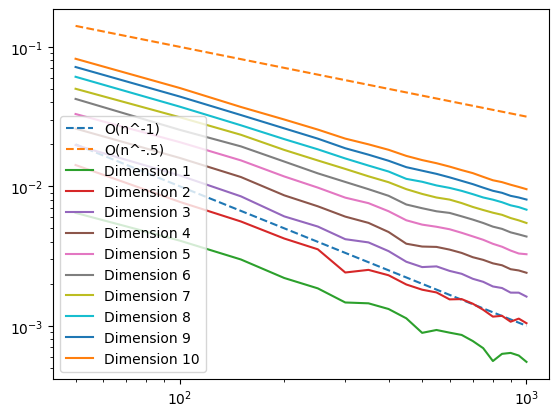

-0.8470216858482673


In [9]:
[alpha_choice, wssd, runtime] = alpha_generate(10, 5000, 1000, coordw = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])) #generates a 5 dimensional choice for alpha

x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
#I chose my x to be from 50 to 1000 in increments of 50 as they will represent the number of samples n
y_one = 1/x
#The 1/x is for O(n^{-1})
y_half = 1/np.sqrt(x)
#This 1/sqrt(x) is for O(n^{-.5})
dim_1 = np.array([])
dim_2 = np.array([])
dim_3 = np.array([])
dim_4 = np.array([])
dim_5 = np.array([])
dim_6 = np.array([])
dim_7 = np.array([])
dim_8 = np.array([])
dim_9 = np.array([])
dim_10 = np.array([])
#initializing dims 1 to 5 as they will be used to record discrepancy for n samples

for d in range(1,11):
    for n in range(50, 1001, 50):
        alphamat = alpha_choice[:d]
            
        xkron = kronecker(n, alphamat)
        Kernel = np.prod((1 + (0.5*(xkron*(xkron-1) + 1/6))),2)
        k = n- np.arange(n-1).reshape((n-1, 1)) -1
            
        discrepancy = np.sqrt(np.sum((n*Kernel[0,:]) + (2*np.sum(k*Kernel[1:n,:],0)))*(n**(-2)) - 1)
        if d == 1:
            dim_1 = np.append(dim_1, discrepancy)
        elif d == 2:
            dim_2 = np.append(dim_2, discrepancy)
        elif d == 3:
            dim_3 = np.append(dim_3, discrepancy)
        elif d == 4:
            dim_4 = np.append(dim_4, discrepancy)
        elif d == 5:
            dim_5 = np.append(dim_5, discrepancy)
        elif d == 6:
            dim_6 = np.append(dim_6, discrepancy)
        elif d == 7:
            dim_7 = np.append(dim_7, discrepancy)
        elif d == 8:
            dim_8 = np.append(dim_8, discrepancy)
        elif d == 9:
            dim_9 = np.append(dim_9, discrepancy)
        elif d == 10:
            dim_10 = np.append(dim_10, discrepancy)

plt.figure()
plt.loglog(x, y_one, label = "O(n^-1)", linestyle = '--')
plt.loglog(x, y_half, label = "O(n^-.5)", linestyle = '--')
plt.loglog(x, dim_1, label = "Dimension 1")
plt.loglog(x, dim_2, label = "Dimension 2")
plt.loglog(x, dim_3, label = "Dimension 3")
plt.loglog(x, dim_4, label = "Dimension 4")
plt.loglog(x, dim_5, label = "Dimension 5")
plt.loglog(x, dim_6, label = "Dimension 6")
plt.loglog(x, dim_7, label = "Dimension 7")
plt.loglog(x, dim_8, label = "Dimension 8")
plt.loglog(x, dim_9, label = "Dimension 9")
plt.loglog(x, dim_10, label = "Dimension 10")
plt.title("Runtime per dimension")
plt.legend()
plt.show()
X = np.log(np.array(x))
Y = np.log(dim_1)
m, b = np.polyfit(X, Y, 1)
print(m)

In [ ]:
y = np.array([])
X = np.log(np.array(x))
Y_1 = np.log(np.array(dim_1))
Y_2 = np.log(np.array(dim_2))
Y_3 = np.log(np.array(dim_3))
Y_4 = np.log(np.array(dim_4))
Y_5 = np.log(np.array(dim_5))
Y_6 = np.log(np.array(dim_6))
Y_7 = np.log(np.array(dim_7))
Y_8 = np.log(np.array(dim_8))
Y_9 = np.log(np.array(dim_9))
Y_10 = np.log(np.array(dim_10))
m, b = np.polyfit(X, Y_1, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_2, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_3, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_4, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_5, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_6, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_7, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_8, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_9, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_10, 1)
y = np.append(y, np.array([m]))
print(np.log(-1*(y+.5)))
X_dim = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure()
plt.plot(X_dim, np.log(-1*(y+.5)))
plt.show()

In [ ]:
[alpha_choice, wssd, runtime] = alpha_generate(10, 5000, 1000, coordw = np.array([1, 1/4, 1/9, 1/16, 1/25, 1/36, 1/49, 1/64, 1/81, 1/100, 1/121])) #generates a 5 dimensional choice for alpha

x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
#I chose my x to be from 50 to 1000 in increments of 50 as they will represent the number of samples n
y_one = 1/x
#The 1/x is for O(n^{-1})
y_half = 1/np.sqrt(x)
#This 1/sqrt(x) is for O(n^{-.5})
dim_1 = np.array([])
dim_2 = np.array([])
dim_3 = np.array([])
dim_4 = np.array([])
dim_5 = np.array([])
dim_6 = np.array([])
dim_7 = np.array([])
dim_8 = np.array([])
dim_9 = np.array([])
dim_10 = np.array([])
#initializing dims 1 to 5 as they will be used to record discrepancy for n samples

for d in range(1,11):
    for n in range(50, 1001, 50):
        alphamat = alpha_choice[:d]
            
        xkron = kronecker(n, alphamat)
        Kernel = np.prod((1 + (0.5*(xkron*(xkron-1) + 1/6))),2)
        k = n- np.arange(n-1).reshape((n-1, 1)) -1
            
        discrepancy = np.sqrt(np.sum((n*Kernel[0,:]) + (2*np.sum(k*Kernel[1:n,:],0)))*(n**(-2)) - 1)
        if d == 1:
            dim_1 = np.append(dim_1, discrepancy)
        elif d == 2:
            dim_2 = np.append(dim_2, discrepancy)
        elif d == 3:
            dim_3 = np.append(dim_3, discrepancy)
        elif d == 4:
            dim_4 = np.append(dim_4, discrepancy)
        elif d == 5:
            dim_5 = np.append(dim_5, discrepancy)
        elif d == 6:
            dim_6 = np.append(dim_6, discrepancy)
        elif d == 7:
            dim_7 = np.append(dim_7, discrepancy)
        elif d == 8:
            dim_8 = np.append(dim_8, discrepancy)
        elif d == 9:
            dim_9 = np.append(dim_9, discrepancy)
        elif d == 10:
            dim_10 = np.append(dim_10, discrepancy)

plt.figure()
plt.loglog(x, y_one, label = "O(n^-1)", linestyle = '--')
plt.loglog(x, y_half, label = "O(n^-.5)", linestyle = '--')
plt.loglog(x, dim_1, label = "Dimension 1")
plt.loglog(x, dim_2, label = "Dimension 2")
plt.loglog(x, dim_3, label = "Dimension 3")
plt.loglog(x, dim_4, label = "Dimension 4")
plt.loglog(x, dim_5, label = "Dimension 5")
plt.loglog(x, dim_6, label = "Dimension 6")
plt.loglog(x, dim_7, label = "Dimension 7")
plt.loglog(x, dim_8, label = "Dimension 8")
plt.loglog(x, dim_9, label = "Dimension 9")
plt.loglog(x, dim_10, label = "Dimension 10")
plt.legend()
plt.show()
X = np.log(np.array(x))
Y = np.log(dim_1)
m, b = np.polyfit(X, Y, 1)
print(m)

In [ ]:
y = np.array([])
Y_1 = np.log(np.array(dim_1))
Y_2 = np.log(np.array(dim_2))
Y_3 = np.log(np.array(dim_3))
Y_4 = np.log(np.array(dim_4))
Y_5 = np.log(np.array(dim_5))
Y_6 = np.log(np.array(dim_6))
Y_7 = np.log(np.array(dim_7))
Y_8 = np.log(np.array(dim_8))
Y_9 = np.log(np.array(dim_9))
Y_10 = np.log(np.array(dim_10))
m, b = np.polyfit(X, Y_1, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_2, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_3, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_4, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_5, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_6, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_7, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_8, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_9, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_10, 1)
y = np.append(y, np.array([m]))
X_dim = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(y)
plt.figure()
plt.plot(X_dim, np.log(-1*(y+.5)))
plt.show()
m, b = np.polyfit(X_dim, np.log(-1*(y+.5)), 1)
print(m)
print(b)

In [ ]:
slope_m = np.array([])
y_intercept = np.array([])
for i in range(200):
    [alpha_choice, wssd, runtime] = alpha_generate(10, 5000, 1000, coordw = np.array([1, 1/4, 1/9, 1/16, 1/25, 1/36, 1/49, 1/64, 1/81, 1/100, 1/121])) #generates a 5 dimensional choice for alpha

    x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
    #I chose my x to be from 50 to 1000 in increments of 50 as they will represent the number of samples n
    y_one = 1/x
    #The 1/x is for O(n^{-1})
    y_half = 1/np.sqrt(x)
    #This 1/sqrt(x) is for O(n^{-.5})
    dim_1 = np.array([])
    dim_2 = np.array([])
    dim_3 = np.array([])
    dim_4 = np.array([])
    dim_5 = np.array([])
    dim_6 = np.array([])
    dim_7 = np.array([])
    dim_8 = np.array([])
    dim_9 = np.array([])
    dim_10 = np.array([])
    #initializing dims 1 to 5 as they will be used to record discrepancy for n samples
    
    for d in range(1,11):
        for n in range(50, 1001, 50):
            alphamat = alpha_choice[:d]
                
            xkron = kronecker(n, alphamat)
            Kernel = np.prod((1 + (0.5*(xkron*(xkron-1) + 1/6))),2)
            k = n- np.arange(n-1).reshape((n-1, 1)) -1
                
            discrepancy = np.sqrt(np.sum((n*Kernel[0,:]) + (2*np.sum(k*Kernel[1:n,:],0)))*(n**(-2)) - 1)
            if d == 1:
                dim_1 = np.append(dim_1, discrepancy)
            elif d == 2:
                dim_2 = np.append(dim_2, discrepancy)
            elif d == 3:
                dim_3 = np.append(dim_3, discrepancy)
            elif d == 4:
                dim_4 = np.append(dim_4, discrepancy)
            elif d == 5:
                dim_5 = np.append(dim_5, discrepancy)
            elif d == 6:
                dim_6 = np.append(dim_6, discrepancy)
            elif d == 7:
                dim_7 = np.append(dim_7, discrepancy)
            elif d == 8:
                dim_8 = np.append(dim_8, discrepancy)
            elif d == 9:
                dim_9 = np.append(dim_9, discrepancy)
            elif d == 10:
                dim_10 = np.append(dim_10, discrepancy)
    print(i)
    y = np.array([])
    Y_1 = np.log(np.array(dim_1))
    Y_2 = np.log(np.array(dim_2))
    Y_3 = np.log(np.array(dim_3))
    Y_4 = np.log(np.array(dim_4))
    Y_5 = np.log(np.array(dim_5))
    Y_6 = np.log(np.array(dim_6))
    Y_7 = np.log(np.array(dim_7))
    Y_8 = np.log(np.array(dim_8))
    Y_9 = np.log(np.array(dim_9))
    Y_10 = np.log(np.array(dim_10))
    m, b = np.polyfit(X, Y_1, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_2, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_3, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_4, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_5, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_6, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_7, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_8, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_9, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_10, 1)
    y = np.append(y, np.array([m]))
    X_dim = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    m, b = np.polyfit(X_dim, np.log(-1*(y+.5)), 1)
    slope_m = np.append(slope_m, np.array([m]))
    y_intercept = np.append(y_intercept, np.array([b]))

In [ ]:
print(np.mean(slope_m))
print(np.mean(y_intercept))
print(scipy.stats.ttest_1samp(slope_m, -.0978,alternative='two-sided'))
print(scipy.stats.ttest_1samp(y_intercept, -.7872,alternative='two-sided'))

In [ ]:
y = np.array([])
Y_1 = np.log(np.array(dim_1))
Y_2 = np.log(np.array(dim_2))
Y_3 = np.log(np.array(dim_3))
Y_4 = np.log(np.array(dim_4))
Y_5 = np.log(np.array(dim_5))
Y_6 = np.log(np.array(dim_6))
Y_7 = np.log(np.array(dim_7))
Y_8 = np.log(np.array(dim_8))
Y_9 = np.log(np.array(dim_9))
Y_10 = np.log(np.array(dim_10))
m, b = np.polyfit(X, Y_1, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_2, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_3, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_4, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_5, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_6, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_7, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_8, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_9, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_10, 1)
y = np.append(y, np.array([m]))
X_dim = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y_dim = -1*np.exp((-.0978*X_dim) - 0.7872) -.5
plt.figure()
plt.plot(X_dim, y)
plt.plot(X_dim, Y_dim)
plt.show()
m, b = np.polyfit(X_dim, y, 1)

In [ ]:
slope_m = np.array([])
y_intercept = np.array([])
for i in range(200):
    [alpha_choice, wssd, runtime] = alpha_generate(10, 5000, 1000, coordw = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])) #generates a 5 dimensional choice for alpha

    x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
    #I chose my x to be from 50 to 1000 in increments of 50 as they will represent the number of samples n
    y_one = 1/x
    #The 1/x is for O(n^{-1})
    y_half = 1/np.sqrt(x)
    #This 1/sqrt(x) is for O(n^{-.5})
    dim_1 = np.array([])
    dim_2 = np.array([])
    dim_3 = np.array([])
    dim_4 = np.array([])
    dim_5 = np.array([])
    dim_6 = np.array([])
    dim_7 = np.array([])
    dim_8 = np.array([])
    dim_9 = np.array([])
    dim_10 = np.array([])
    #initializing dims 1 to 5 as they will be used to record discrepancy for n samples
    
    for d in range(1,11):
        for n in range(50, 1001, 50):
            alphamat = alpha_choice[:d]
                
            xkron = kronecker(n, alphamat)
            Kernel = np.prod((1 + (0.5*(xkron*(xkron-1) + 1/6))),2)
            k = n- np.arange(n-1).reshape((n-1, 1)) -1
                
            discrepancy = np.sqrt(np.sum((n*Kernel[0,:]) + (2*np.sum(k*Kernel[1:n,:],0)))*(n**(-2)) - 1)
            if d == 1:
                dim_1 = np.append(dim_1, discrepancy)
            elif d == 2:
                dim_2 = np.append(dim_2, discrepancy)
            elif d == 3:
                dim_3 = np.append(dim_3, discrepancy)
            elif d == 4:
                dim_4 = np.append(dim_4, discrepancy)
            elif d == 5:
                dim_5 = np.append(dim_5, discrepancy)
            elif d == 6:
                dim_6 = np.append(dim_6, discrepancy)
            elif d == 7:
                dim_7 = np.append(dim_7, discrepancy)
            elif d == 8:
                dim_8 = np.append(dim_8, discrepancy)
            elif d == 9:
                dim_9 = np.append(dim_9, discrepancy)
            elif d == 10:
                dim_10 = np.append(dim_10, discrepancy)
    print(i)
    y = np.array([])
    Y_1 = np.log(np.array(dim_1))
    Y_2 = np.log(np.array(dim_2))
    Y_3 = np.log(np.array(dim_3))
    Y_4 = np.log(np.array(dim_4))
    Y_5 = np.log(np.array(dim_5))
    Y_6 = np.log(np.array(dim_6))
    Y_7 = np.log(np.array(dim_7))
    Y_8 = np.log(np.array(dim_8))
    Y_9 = np.log(np.array(dim_9))
    Y_10 = np.log(np.array(dim_10))
    m, b = np.polyfit(X, Y_1, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_2, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_3, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_4, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_5, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_6, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_7, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_8, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_9, 1)
    y = np.append(y, np.array([m]))
    m, b = np.polyfit(X, Y_10, 1)
    y = np.append(y, np.array([m]))
    X_dim = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    m, b = np.polyfit(X_dim, np.log(-1*(y+.5)), 1)
    slope_m = np.append(slope_m, np.array([m]))
    y_intercept = np.append(y_intercept, np.array([b]))

In [ ]:
print(np.mean(slope_m))
print(np.mean(y_intercept))
print(scipy.stats.ttest_1samp(slope_m, -.07255,alternative='two-sided'))
print(scipy.stats.ttest_1samp(y_intercept, -.81806,alternative='two-sided'))

In [ ]:
y = np.array([])
Y_1 = np.log(np.array(dim_1))
Y_2 = np.log(np.array(dim_2))
Y_3 = np.log(np.array(dim_3))
Y_4 = np.log(np.array(dim_4))
Y_5 = np.log(np.array(dim_5))
Y_6 = np.log(np.array(dim_6))
Y_7 = np.log(np.array(dim_7))
Y_8 = np.log(np.array(dim_8))
Y_9 = np.log(np.array(dim_9))
Y_10 = np.log(np.array(dim_10))
m, b = np.polyfit(X, Y_1, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_2, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_3, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_4, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_5, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_6, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_7, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_8, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_9, 1)
y = np.append(y, np.array([m]))
m, b = np.polyfit(X, Y_10, 1)
y = np.append(y, np.array([m]))
X_dim = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y_dim = -1*np.exp((-.07255*X_dim) - .81806) -.5
plt.figure()
plt.plot(X_dim, y)
plt.plot(X_dim, Y_dim)
plt.show()
m, b = np.polyfit(X_dim, y, 1)

In [4]:
kron = qp.Kronecker(2)
x = kron.gen_samples(1000)
print(x[0,:])
print(x.shape)

[0. 0.]
(1000, 2)


In [8]:
def disc(x, C = np.ones(100)):
    start = time.time()
    N,d = x.shape
    C = C[0:d]
    Kernel = np.prod(1 + (0.5*C*(x*(x-1) + 1/6)),1)
    n = np.arange(1, N+1)
    #This is the n*K(0)
    A = n*Kernel[0] #Correct
    #First calculate
    Summation = np.array([0])
    Summation = np.append(Summation, np.cumsum(Kernel[1:]))
    B_1 = n*Summation
    B_2 = np.array([0])
    B_2 = np.append(B_2, np.cumsum(n[:N-1]*Kernel[1:]))
    B = B_1 - B_2
    end = time.time()
    return np.sqrt(((A + (2*B))/(n**(2)))-1)

In [9]:
kron = qp.Kronecker(2)
x = kron.gen_samples(1000)
print(disc(x).size)

1000


In [9]:
d = np.arange(100) + 1
n = np.arange(1000) + 1
[alpha, wssd, runtime] = alpha_generate(100, 5000, 1000, coordw = np.ones(1000))
print(runtime)
unweighted_data = np.array([])
for j in range(100):
    kron = qp.Kronecker(alpha = alpha[:j])
    x = kron.gen_samples(1000)
    output = disc(x)
    Y = np.log(output)
    n_log = np.log(n)
    m, b = np.polyfit(n_log, Y, 1)
    unweighted_data = np.append(unweighted_data, m)

71.67120862007141


NameError: name 'disc' is not defined

In [8]:
[alpha, wssd, runtime] = alpha_generate(10, 5000, 1000, coordw = np.ones(1000))
print(runtime)

13.729814291000366


In [11]:
d = np.arange(100) + 1
n = np.arange(1000) + 1
square = 1/((np.arange(100)+1)**2)
[alpha, wssd, runtime] = alpha_generate(100, 5000, 1000, coordw = square)
print(runtime)
weighted_data = np.array([])
for j in range(100):
    kron = qp.Kronecker(alpha = alpha[:j])
    x = kron.gen_samples(1000)
    output = disc(x, square)
    Y = np.log(output)
    n_log = np.log(n)
    m, b = np.polyfit(n_log, Y, 1)
    weighted_data = np.append(weighted_data, m)

33.022916078567505


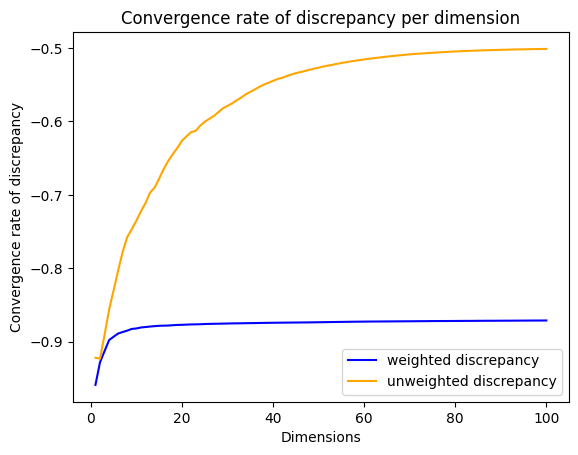

In [15]:
plt.plot(d, weighted_data, color = 'blue', label = "weighted discrepancy")
plt.plot(d, unweighted_data, color = 'orange', label = "unweighted discrepancy")
plt.xlabel('Dimensions')
plt.ylabel('Convergence rate of discrepancy')
plt.title('Convergence rate of discrepancy per dimension')
plt.legend()
plt.show()

In [14]:
print(weighted_data)

[-0.95879915 -0.92800541 -0.91278231 -0.89775843 -0.89311747 -0.88875765
 -0.88678386 -0.88482871 -0.88256289 -0.88193929 -0.88058827 -0.87998483
 -0.87932823 -0.8787775  -0.87832333 -0.87810119 -0.87798399 -0.87750265
 -0.87715798 -0.87698127 -0.87669741 -0.87645181 -0.87636108 -0.87618725
 -0.87589857 -0.87571514 -0.87560954 -0.8754764  -0.87534028 -0.87521362
 -0.87507325 -0.87496711 -0.87488594 -0.87477705 -0.87467343 -0.87460848
 -0.87446047 -0.87438098 -0.87428152 -0.87419092 -0.87412566 -0.87406507
 -0.87398347 -0.87394583 -0.87386057 -0.8737868  -0.87373288 -0.8736779
 -0.87358031 -0.87346108 -0.87341993 -0.87328676 -0.87318832 -0.87309575
 -0.8730152  -0.87292928 -0.87283536 -0.87275524 -0.87268335 -0.87262555
 -0.87256329 -0.87250977 -0.87246695 -0.87241116 -0.87239329 -0.87232339
 -0.87228332 -0.87223396 -0.87218765 -0.87215856 -0.872114   -0.87205841
 -0.87200766 -0.87195199 -0.87188902 -0.87186942 -0.87183404 -0.87181221
 -0.87178629 -0.87174408 -0.87169472 -0.87164944 -0.

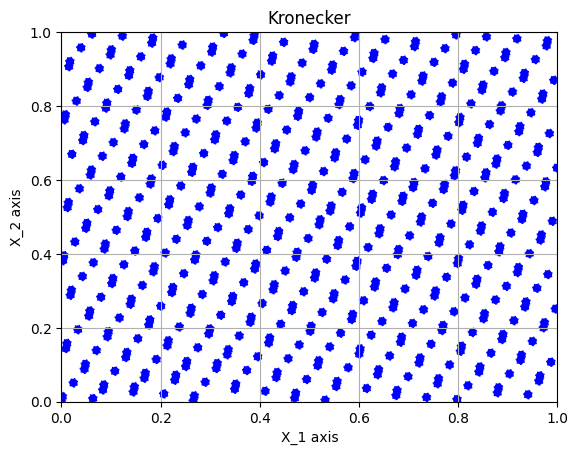

In [13]:
kronecker = qp.Kronecker(2)
K = kronecker.gen_samples(512)
plt.scatter(K[:,0], K[:,1], color='blue', linestyle='dotted')
plt.title('Kronecker')
plt.xlabel('X_1 axis')
plt.ylabel('X_2 axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()

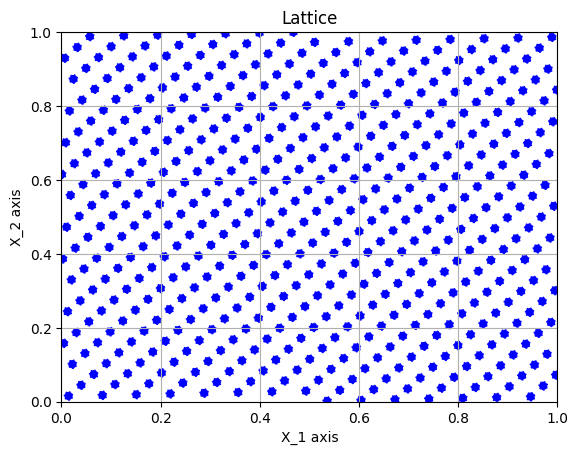

In [3]:
lattice = qp.Lattice(2)
L = lattice.gen_samples(512)
plt.scatter(L[:,0], L[:,1], color='blue', linestyle='dotted')
plt.title('Lattice')
plt.xlabel('X_1 axis')
plt.ylabel('X_2 axis')
plt.axis((0, 1, 0, 1))
plt.grid(True)
plt.show()